# Quantum Gates
So far you are familiar with classical gates, however in quantum computing we need to use other gates. Thus in this lecture, quantum gates and circuits will be explained. We will go over the most basic operations and how they can be implemented in [QISKIT](https://github.com/Qiskit/qiskit). QISKIT is an open-source quantum computing software development framework for leveraging today's quantum processors in research, education, and business. It provides tools for creating and manipulating quantum programs and running them on prototype quantum devices and simulators.

In [14]:
import qiskit
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

## Single Qubit Gates
To show how different quantum principles can be simulated, we need some understanding of quantum gates. Now we will see how to implement these principles in QISKIT. First, you need to install the QISKIT library.


In [15]:
# To create a single qubit we can use the following
single_qubit = qiskit.QuantumCircuit(1)

### Hadamard Gate
There are a lot of different gates that we can simulate using QISKIT. The most basic one is the Hadamard gate. The Hadamard gate is a one-qubit operation that maps the basis state $\ket{0}$ to the superposition state $\frac{|0⟩ + |1⟩}{\sqrt{2}}$ and the basis state $\ket{1}$ to the superposition state $\frac{|0⟩ - |1⟩}{\sqrt{2}}$. In other words, it takes a qubit in the state $\ket{0}$ or $\ket{1}$ and puts it into an equal superposition of both states.


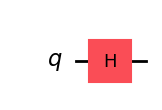

In [16]:
hadamard_qubit = QuantumCircuit(1) # Create a quantum circuit with one qubit
hadamard_qubit.h(0) # Apply Hadamard gate to qubit 0
hadamard_qubit.draw('mpl') # Draw the circuit

### Rotation Gates
Another important gate is the rotation gate. The rotation gate is a one-qubit operation that rotates the state of a qubit around the Bloch sphere. There are three types of rotation gates: Rx, Ry, and Rz. The Rx gate rotates the qubit around the x-axis, the Ry gate rotates the qubit around the y-axis, and the Rz gate rotates the qubit around the z-axis. These gates can be very useful for example to create a bias in a qubit. Maybe you want to represent a coin that has a higher chance of landing on heads. To do this you can actually apply a rotation gate after the Hadamard gate. To rotation can be represented as a mathematical operator:
$$
R_x(\theta)= \begin{bmatrix} cos(\frac{\theta}{2}) & -isin(\frac{\theta}{2}) \\ -isin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix} \quad
R_y(\theta)= \begin{bmatrix} cos(\frac{\theta}{2}) & sin(\frac{\theta}{2}) \\ sin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{bmatrix} \quad
R_z(\theta)= \begin{bmatrix} e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{i\frac{\theta}{2}} \end{bmatrix}
$$


From these gates we can see that the $R_y$ gate is solely changing the amplitude, which result to the probability. $R_z$ is only changing the phase and $R_x$ is both changing the phase and the amplitude at the same time.

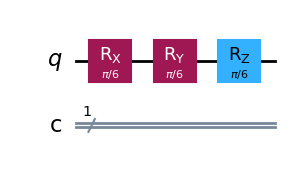

In [25]:
# These gates can simply be implemented in QISKIT:
r_qc = QuantumCircuit(1,1)
r_qc.rx(np.pi/6, 0)   # Rotation of pi/6 around the y-axis on qubit 0
r_qc.ry(np.pi/6, 0)   # Rotation of pi/6 around the y-axis on qubit 0
r_qc.rz(np.pi/6, 0)   # Rotation of pi/6 around the y-axis on qubit 0
r_qc.draw('mpl')

#### Pauli Gates
Pauli gates are a very useful example of the rotation gates. Also the pauli gates are present in both the x, y and z direction. The Pauli x-gate is the equivalent of a classical not gate. The Pauli y-gate is a combination of a bit and phase flip. Lastly the Pauli z-gate is a phase flip. The mathematical representation of these gates are:
$$ \sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \quad
\sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad
\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$
As can be seen these pauli gates are just the rotation gates, but than for $\theta= \pi$. However, in literature they are always referred to as simply pauli gates.

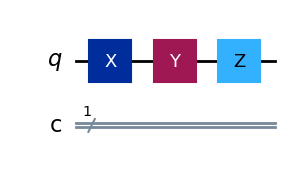

In [26]:
sigma_qc = QuantumCircuit(1,1)
sigma_qc.x(0)   # Pauli x-gate on qubit 0
sigma_qc.y(0)   # Pauli y-gate on qubit 0
sigma_qc.z(0)   # Pauli z-gate on qubit 0
sigma_qc.draw('mpl')

### CNOT Gate

## Simulating Quantum principles

### Simulation
In QISKIT it is possible to create different simulations. For our case we want to work with real data and outcomes. Thus we will use the AerSimulator to simulate our quantum circuits. In the following code you will how we must initialize the simulator and run a simple circuit with a Hadamard gate and a measurement.

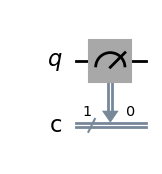

In [22]:
def simulate():
    ## Initialize the simulator
    sim = AerSimulator()

    ## Generates a transpiled version of the quantum circuit that is optimized for the specified backend (simulator in this case)
    tqc = transpile(qc, sim)
    ## Run the simulation with 1000 shots (repetitions) to get a distribution of results
    result = sim.run(tqc, shots=1000).result()
    return result



## create a quantum circuit with one qubit
qc = QuantumCircuit(1, 1)

## Before measuring you can apply a certain gate
## With the qc.measure function we can measure the qubit and the result can be stored in a 'classical' bit
qc.measure(0, 0)

qc.draw('mpl')

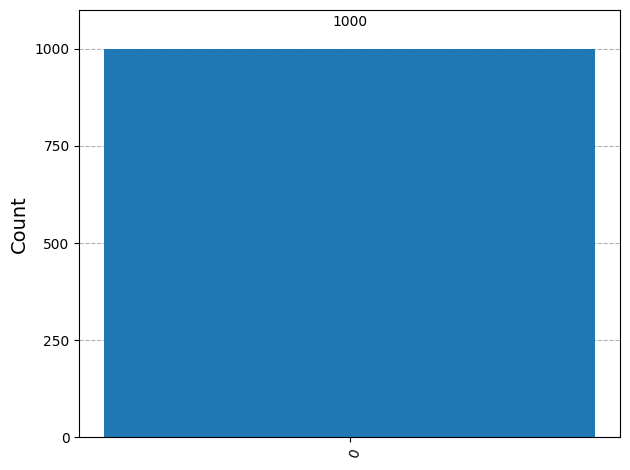

In [23]:
plot_histogram(simulate().get_counts())

### Superposition

With this simulations we can actually recreated the quantum principles. First of we have superposition, as said before superposition is the ability for a quantum system to be in different states at the same time. The goal now is to apply a certain gate that has been taught before, so you can simulate the effect of a superposition.

In [19]:
## Create a quantum circuit with one qubit

# Apply a certain gate taught before and measure the qubit

# Use the simulate function

# Plot the result and draw the circuit

#### 'Introducing bias'
As taught before we have other gates that can rotate the states, which will make some states more favorable. In the following code you must try to create a coin that is 75% biased to land on heads, (let heads be the $\ket{0}$ and tails $\ket{1}$). Then plot the results, from the results it must be seen that it will be a distribution of 750 heads and 250 tails.

#### Bonus 'Flipping the coin'
As a bonus try to create the qiskit implementation of flipping this coin and then plot the results again.

### Entanglement

### Tunneling